1. Read all the TSV files into an array, write a function to extract the title and authors data
2. Go through each TSV and use title and authors to search the OCLC for OWI number
3. Go through each OWI and get:
    3.1 Earliest year published
    3.2 Holdings
    3.3 For OWI with the most holdings: VIAF -> Genders
    3.5 For each OWI where "book" in .get("format")
    Make Genders -> DDC dict, add to it manually
4. Make a dict of TITLE/AUTHOR STRING -> OWI, YEAR_PUBLISHED, GENDER(S), TOP_DDC, FAST_LIST?

In [1]:
import csv, os
from datetime import datetime
f_filen = "tabula-1963-03-17.tsv"
nf_filen = "tabula-1963-03-17-nf.tsv"
data_i = 2 #How far into the tsv file the data shows up...
fields = ['rank','title+author','rank_last_week','weeks_on_list']
stop_words_authors = ["Others"]

# Read the Data In

In [2]:
def empty(row):
    if row[0]=="":
        return True
    return False 

def extract_date(datestr):
    try:
        date = datetime.strptime(datestr[0],'%B %d, %Y')
    except ValueError:
        try:
            date = datetime.strptime(datestr[0],'%B %d,%Y')
        except ValueError:
            datestr = input("Enter the date in %B %d, %Y format: ")
            date = datetime.strptime(datestr,'%B %d, %Y')
    return date

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def header(row):
    if is_number(row[0]):
        return False
    else:
        return True
    
def read_tsv(name):
    i = 0
    arr = []
    date = ""
    with open(name) as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            if (header(row)) & (not empty(row)) & (i>data_i):
                return arr
            if i ==0 :
                date = extract_date([row[1]])
            if ((i > data_i) & (not empty(row))):
                arr.append([date]+row)
            i = i+1
        return arr
    
def read_folder(folderpath):
    arr = []
    for f in os.listdir(folderpath):
        commasv = read_tsv(folderpath+f)
        arr = arr+commasv
    return arr

eighty_path = "1980s/"
eighties = read_folder(eighty_path)
for x in eighties[0:10]:
    print x

[datetime.datetime(1981, 9, 27, 0, 0), '1', 'THE HOTEL NEW HAMPSHIRE, by John Irving. (Dutton/Henry Robbins, $15.50.)', '5', '2']
[datetime.datetime(1981, 9, 27, 0, 0), '2', 'CUJO, by Stephen King. (Viking, $13.95.) Monsters haunt a New York family', '1', '7']
[datetime.datetime(1981, 9, 27, 0, 0), '3', 'NOBLE HOUSE, by James Clavell. (Delacorte, $19.95.) British and Chinese', '2', '21']
[datetime.datetime(1981, 9, 27, 0, 0), '4', "THE THIRD DEADLY SIN, by Lawrence Sanders. (Putnam's, $13.95.) Chief of", '3', '9']
[datetime.datetime(1981, 9, 27, 0, 0), '5', 'GORKY PARK, by Martin Cruz Smith. (Random House, $13.95.) A triple murder in', '4', '25']
[datetime.datetime(1981, 9, 27, 0, 0), '6', 'BREAD UPON THE WATERS, by Irwin Shaw. (Delacorte, $14.95.) An', '--', '1']
[datetime.datetime(1981, 9, 27, 0, 0), '7', 'THE LAST DAYS OF AMERICA, by Paul Erdman. (Simon & Schuster, $13.95.)', '8', '5']
[datetime.datetime(1981, 9, 27, 0, 0), '8', 'THE GLITTER DOME, by Joseph Wambaugh. (Morrow/Perigor

# Get Title and Author

In [3]:
skip_these = set()

In [4]:
auth_i = 4

def parse_author_phrase(a_ph):
    authors = []
    end = len(a_ph)
    parens = a_ph.find("(")
    if parens != -1:
        end = parens-1
    auth_ph = a_ph[auth_i:end]
    if " and " in auth_ph:
        author_arr = auth_ph.split(" and ")
        for author in author_arr:
            if author[len(author)-1]=='.':
                author = author[:len(author)-1] # strip trailing period
            authors.append(author)
    else:
        author = auth_ph
        if author[len(author)-1]=='.':
            author = author[:len(author)-1] # strip trailing period
        authors.append(author)
    return authors

def title_author_pair(data_str):
    split_str = data_str.split(',')
    title = ""
    auth_ph = ""
    i=0
    t=True
    for phrase in split_str:    
        if i == 0:
            title = phrase
        else:
            if phrase.isupper() & t:
                title = title + ", "+phrase
            else:
                t = False
                auth_ph = auth_ph+phrase
        i = i+1
    try:
        authors = parse_author_phrase(auth_ph)
    except:
        skip_these.add(data_str)
        authors = data_str
    return (title,authors)

ta = set()
for x in eighties:
    title = title_author_pair(x[2])[0]
    ta.add(title)
print len(ta)

586


In [111]:
fix_these = []
for x in eighties[0:860]:
    authors = title_author_pair(x[2])[1]
    if len(authors)>1:
        fix_these.append(x)
print len(fix_these)

process_raw_list(fix_these)

20
0
10


[{'authors': ['Stephen King', 'Peter Straub'],
  'date': datetime.datetime(1984, 11, 11, 0, 0),
  'fast_subjects': {'American fiction',
   'Authors, American',
   'Boys',
   'Ex-police officers',
   'Fantasy fiction',
   'Good and evil',
   'Graphic novels',
   'Horror tales',
   'Horror tales, American',
   'Maine',
   'Mother and child',
   'Mothers and sons',
   'Quests (Expeditions)',
   'Serial murders',
   'Talismans',
   'Voyages and travels'},
  'genders': [{'gender': 'Male', 'name': 'Stephen King', 'viaf': '97113511'},
   {'gender': 'Male', 'name': 'Peter Straub', 'viaf': '73860475'}],
  'owi': '1071197',
  'title': 'THE TALISMAN',
  'year': 1984,
  'year_pub': '1981'},
 {'authors': ['tten', 'illustrated by Chris Van Allsburg'],
  'date': datetime.datetime(1988, 1, 3, 0, 0),
  'fast_subjects': set(),
  'genders': [],
  'owi': [],
  'title': 'THE POLAR EXPRESS',
  'year': 1988,
  'year_pub': []},
 {'authors': ['Larry Niven', 'Jerry Pournelle'],
  'date': datetime.datetime(1985,

# To OCLC


In [41]:
import xml.etree.ElementTree
import json,pickle
import urllib2
import re

ta_to_data_dict = load_obj("rock_and_roll.pickle") 
oclc_base = "http://classify.oclc.org/classify2/Classify?"
alph = re.compile('[^a-zA-Z]')
suffixes = ['CPA', 'CSC', 'CSJ', 'DC', 'DD', 'DDS', 'DMD', 'DO', 'DVM', 'EDD', 'ESQ', 'II', 'III', 
            'IV', 'INC', 'JD', 'JR', 'LLD', 'LTD', 'MD', 'OD', 'OSB', 'PC', 'PE', 'PHD', 'RET', 
            'RGS', 'RN', 'RNC', 'SHCJ', 'SJ', 'SNJM', 'SR', 'SSMO', 'USA', 'USAF', 'USAFR', 'USAR', 
            'USCG', 'USMC', 'USMCR', 'USN', 'USNR']

In [31]:
def write_obj(obj,filename):
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename, 'rb') as handle:
        b = pickle.load(handle)
        return b


In [17]:
def suffix(phrase):
    norm_phrase = phrase.replace(',',"").upper()
    if norm_phrase in suffixes:
        return True
    else:
        return False
    
def strip_punct(text):
    return alph.sub('', text)

def norm_text(text):
    return strip_punct(text).lower()

def url_to_data(url,f):
    req = urllib2.Request(url)
    req.add_header('User-agent', 'Mozilla 5.10')
    res = urllib2.urlopen(req)
    if(f=="xml"):
        data = xml.etree.ElementTree.parse(res).getroot()
    if(f=="json"):
        data = json.load(res)
    return data

def convert_to_search(name):
    return_string = ""
    last_ch = " "
    for ch in name:
        if (ch == " "):
            if (last_ch != "."):
                return_string = return_string + "+"
        else:
            if ch == ".":
                return_string = return_string +".+"
            else:
                return_string = return_string+ch
        last_ch = ch
    return return_string

def last_name_recursive(name,last_index):
    if last_index == 0:
        return ""
    last_phrase = name[last_index]
    if not suffix(last_phrase):
        return last_phrase
    else:
        return last_name_recursive(name, last_index-1)

def last_name(name):
    names = name.split(" ")
    last_index = len(names)-1
    last = last_name_recursive(names,last_index)
    return last

def first_name(name):
    names = name.split(" ")
    return names[0]

In [37]:
from lxml import html
from bs4 import BeautifulSoup
import requests

viaf_base = "http://www.viaf.org/viaf/"
    
def get_gender_scrape(i):
    url = viaf_base+str(i)+"/"
    data = requests.get(url).text
    soup = BeautifulSoup(data,"lxml")
    personal = soup.find('div',{'id':'personalinfo'})
    if personal is None:
        return ""
    h4s = personal.find('h4')
    if (h4s is None) or (len(h4s)<5):
        return ""
    mt = []
    i=0
    for h in h4s:
        mt.append(h)
        i = i+1
    return str(mt[4])

In [82]:
def is_book(w,t,a):
    if "book" in norm_text(w.get("format")):
        if norm_text(t) in norm_text(w.get("title")):
            for auth in a:
                if last_name(norm_text(auth)) in norm_text(w.get("author")):
                    return True
    return False

def find_all_works(xml,title,authors):
    works = xml.find('{http://classify.oclc.org}works')
    if works is None:
        works = []
        works.append(xml.find('{http://classify.oclc.org}work'))
        if (works is None) or works == []:
            return []        
    books = []
    for w in works:
        if is_book(w,title,authors):
            owi = w.get("owi")
            holdings = w.get("holdings")
            try:
                lyr = w.get("lyr")
            except:
                lyr = ""
            books.append({"owi":owi,"holdings":holdings,"lyr":lyr})
    return books

def new_work(w, entries):
    if int(w['holdings']) < 50:
        return False
    for e in entries:
        if w['owi'] == e["owi"]:
             return False
    return True

def get_oclc_entries(title,authors):
    url = oclc_base +"title="+convert_to_search(title)
    #i = 0
    entries = []
    for a in authors:
        auth_url = url +"&author=" + last_name(a)
        xml = url_to_data(auth_url,"xml")
        try:
            works = find_all_works(xml,title,authors)
        except:
            return []
        if works is None:
            return []
        if entries == []:
            entries = works
        else:
            for w in works:
                if new_work(w,entries):
                    entries.append(w)
        #i = i+1
    return entries
    
print get_oclc_entries('BELOVED', ['Toni Morrison']) 

def max_holding(oarr):
    target = oarr[0]
    for o in oarr[1:]:
        if int(o['holdings'])>int(target['holdings']):
            target = o
    return target

def get_authors(xml):
    authors = xml.find('{http://classify.oclc.org}authors')
    target = []
    for a in authors:
        text = a.text
        v = a.get('viaf')
        target.append({'name':text, 'viaf':v})
    return target

def get_fast(xml):
    recs = xml.find('{http://classify.oclc.org}recommendations')
    target = []
    if recs is not None:
        fast = recs.find('{http://classify.oclc.org}fast')
        if fast is not None:
            headings = fast.find('{http://classify.oclc.org}headings')
            for h in headings:
                target.append(h.text)
    return target

def lookup_oclc(owi):
    url = oclc_base+"owi="+owi
    xml = url_to_data(url,"xml")
    v = get_authors(xml)
    fast = get_fast(xml)
    target = {'authors':v,'fast':fast}
    return target

test_author_dict = [{'viaf': '22619695', 'name': 'Bailey, Charles Waldo, 1929-2012 [Author]'}, {'viaf': '19720195', 'name': 'Knebel, Fletcher'}]

def get_genders(authors, viaf_dict):
    target = []
    for a in authors:
        v = get_viaf(a,viaf_dict)
        gender = get_gender_scrape(v)
        target.append({"name":a,"viaf":v,"gender":gender})
    return target
    
def get_viaf(author, viaf_dict_arr):
    l = norm_text(last_name(author))
    f = norm_text(first_name(author))
    target = ""
    for v in viaf_dict_arr:
        if l in norm_text(v['name']):
            target = v['viaf']
            if f in norm_text(v['name']):
                return v['viaf']
    return target

#print(get_genders(["Fletcher Knebel","Charles W. Bailey II"],test_author_dict))


[{'holdings': '13357', 'owi': '989794', 'lyr': '1987'}, {'holdings': '1899', 'owi': '149526417', 'lyr': '1987'}, {'holdings': '982', 'owi': '3768430774', 'lyr': '1998'}, {'holdings': '159', 'owi': '839489420', 'lyr': '2002'}, {'holdings': '61', 'owi': '1151679152', 'lyr': '1970'}, {'holdings': '27', 'owi': '4020568630', 'lyr': '2003'}, {'holdings': '4', 'owi': '301075038', 'lyr': '2001'}, {'holdings': '4', 'owi': '3092748', 'lyr': '????'}, {'holdings': '1', 'owi': '3375545245', 'lyr': '1988'}, {'holdings': '1', 'owi': '866836700', 'lyr': '2008'}]


In [87]:
ta_to_data_dict2 = {}

In [113]:
def process_input_data(ta):       
    # if str(ta) not in ta_to_oclc_dict: CHECK FOR THIS OUTSIDE THE FN
    title = ta[0]
    author = ta[1]
    oclc = get_oclc_entries(title,author)
    if (oclc is None) or (len(oclc)<1):
        owi = []
        holdings = []
        year_pub = []
        fast_subjects = set()
        genders = []
    else:
        if len(oclc) == 1:
            primary = oclc[0]
            primary_data = lookup_oclc(primary['owi'])
            fast_subjects = set(primary_data['fast'])
        else:
            primary = max_holding(oclc)
            primary_data = lookup_oclc(primary['owi'])
            fast_subjects = set(primary_data['fast'])
            for o in oclc:
                if o['owi'] != primary['owi']:
                    other_data = lookup_oclc(o['owi'])
                    fast_subjects.update(other_data['fast'])
        owi = primary["owi"]
        year_pub = primary["lyr"]
        genders = get_genders(author, primary_data['authors'])
    return {"owi": owi, "year_pub": year_pub, "fast_subjects":fast_subjects, "genders":genders}

## need to add the original data (date, year, rankings) if this is the ultimate output
def process_raw_list(input_ls):
    #print "INPUT! "+ str(input_ls)
    target = []
    i = 0
    for row in input_ls:
        #print row
        if (i%1000 == 0):
            print i
            write_obj(ta_to_data_dict,"rock_and_roll.pickle")
        date = row[0]
        year = date.year
        if row[2] in skip_these:
            target_row = {"date":date,"title":row[2],"authors":row[2],"year":year,"owi":"","year_pub":"","fast_subjects":[],"genders":[]}
        else:
            ta = title_author_pair(row[2])
            target_row = {"date":date,"title":ta[0],"authors":ta[1],"year":year}
            string_ta = str(ta)
            if string_ta in ta_to_data_dict:
                target_row.update(ta_to_data_dict[string_ta])
            else:
                processed = process_input_data(ta)
                target_row.update(processed)
                ta_to_data_dict[string_ta] = processed
        target.append(target_row)
        i = i+1
    return target

processed = process_raw_list(eighties)
print processed[0]

0
1000
2000
3000
4000
5000
6000
7000
{'owi': '614234', 'title': 'THE HOTEL NEW HAMPSHIRE', 'year': 1981, 'fast_subjects': set(['Families', 'Hotels', 'New Hampshire', 'Austria--Vienna', 'English fiction']), 'year_pub': '1957', 'authors': ['John Irving'], 'date': datetime.datetime(1981, 9, 27, 0, 0), 'genders': [{'gender': 'Male', 'viaf': '108238891', 'name': 'John Irving'}]}


In [98]:
import pandas

terms = []
for x in processed:
    for y in x['fast_subjects']:
        if genre_candidate(y):
            terms.append(y)
    
term_series = pandas.Series(terms)
counts = term_series.value_counts()
print len(processed)
print(counts)

7761
English fiction                  1461
American fiction                 1053
Detective and mystery stories     870
Romance fiction                   832
Fiction                           810
Adventure stories                 808
Spy stories                       686
Science fiction                   543
Horror tales                      490
Domestic fiction                  488
Spanish fiction                   446
Historical fiction                413
Suspense fiction                  333
Fantasy fiction                   288
War stories                       246
...
Quests (Expeditions) in literature        2
Horror tales, English                     2
Fantasy fiction, Australian               2
Sea stories, English                      2
Nature in literature                      2
Environmental protection in literature    2
Spanish American literature               1
Czech literature                          1
Gothic fiction (Literary genre)           1
Spanish American fiction 

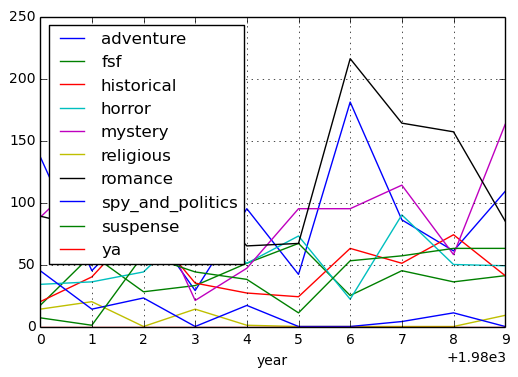

In [119]:
import matplotlib
%matplotlib inline

genre_terms = ["fiction","stories","tales","literature","opera"]
genre_dict = {"romance":{"keys":["romance","love","erotic","domestic"],"stops":["language"]},
              "suspense":{"keys":["suspense"]},
              "horror":{"keys":["horror","paranormal"]},
              "mystery":{"keys":["mystery","detective","crime"]},
              "spy_and_politics":{"keys":["spy ","politic","war "]},
              "fsf":{"keys":["fantasy","science fiction", "space","cyberpunk","steampunk"]},
              "adventure":{"keys":["adventure","western","sea "]},
              "ya":{"keys":["young adult"]},
              "religious":{"keys":["religious","christian"],"stop":["aspects"]},
              "historical":{"keys":["historical"]} ## <-- I think this one might not be a well-supported
                                                   ## category in the DB
            }

def genre_candidate(fast_term):
    for term in genre_terms:
        if term in norm_text(fast_term):
            return True
    return False

def is_genre(fast_term,genre_str):
    terms = genre_dict[genre_str]['keys']
    if 'stops' in genre_dict[genre_str]:
        stops=genre_dict[genre_str]['stops']
    else:
        stops = []
    target = False
    for term in terms:
        if term in norm_text(fast_term):
            target = True
    for stop in stops:
        if stop in norm_text(fast_term):
            target = False
    return target

#def classify_genre(processed_row):
#    subjects = processed_row['fast_subjects']
def classify_genre(subjects):
    #print subjects
    target = {}
    for genre in genre_dict:
        target[genre]=0
    for subject in subjects:
        if genre_candidate(subject):
            for genre in genre_dict:
                if is_genre(subject,genre):
                    target[genre] = 1
    return target

def percent_genres(cl_ls):
    counts_dict = {}
    for genre in genre_dict:
        counts_dict[genre] = 0
    for x in cl_ls:
        for genre in genre_dict:
            counts_dict[genre] = counts_dict[genre]+x[genre]
    for genre in genre_dict:
        counts_dict[genre] = float(counts_dict[genre])/float(len(cl_ls))
    return counts_dict  

def tally_genres(cl_ls):
    counts_dict = {}
    for genre in genre_dict:
        counts_dict[genre] = 0
    for x in cl_ls:
        for genre in genre_dict:
            counts_dict[genre] = counts_dict[genre]+x[genre]
    return counts_dict  
    
def tally_genres_binned(cl_ls,group_val):
    df = pandas.DataFrame(cl_ls)
    grouped = df.groupby(group_val)
    target = []
    for group in grouped:
        classified = []
        index = group[0]
        ls_o_fast_lists = grouped.get_group(index)
        for fast_list in ls_o_fast_lists["fast_subjects"]:
            classified.append(classify_genre(fast_list))
        tallied = tally_genres(classified)
        tallied[group_val] = index
        target.append(tallied)
    return target

def percent_genres_binned(cl_ls,group_val):
    df = pandas.DataFrame(cl_ls)
    grouped = df.groupby(group_val)
    target = []
    for group in grouped:
        classified = []
        index = group[0]
        ls_o_fast_lists = grouped.get_group(index)
        for fast_list in ls_o_fast_lists["fast_subjects"]:
            classified.append(classify_genre(fast_list))
        tallied = percent_genres(classified)
        tallied[group_val] = index
        target.append(tallied)
    return target

tall_df = pandas.DataFrame(tally_genres_binned(processed,"year")).set_index("year")
fig = tall_df.plot().get_figure()
fig.savefig("eighties.png")
#per_df = pandas.DataFrame(percent_genres_by_week(processed,"year")).set_index("year")
#per_df.plot()

In [ ]:
def percent_women_binned(cl_ls,group_val):
    df = pandas.DataFrame(cl_ls)
    grouped = df.groupby(group_val)
    target = []
    for group in grouped:
        classified = []
        index = group[0]
        ls_o_fast_lists = grouped.get_group(index)
        for fast_list in ls_o_fast_lists["fast_subjects"]:
            classified.append(classify_genre(fast_list))
        tallied = percent_genres(classified)
        tallied[group_val] = index
        target.append(tallied)
    return target

{'COME POUR THE WINE,  $12.95.) A': 'COME POUR THE WINE', 'THE CRADLE WILL FALL,  $10.95.) A': 'THE CRADLE WILL FALL', 'Norman Mailler': 'Norman Mailer', 'THE TENTH COMMANDMENT,  $11.95.) A': 'THE TENTH COMMANDMENT', 'THE SECOND COMING,  $12.95.) A': 'THE SECOND COMING'}
